# Car Accident Severity Analysis

## Coursera Data Science Capstone Project

## Introduction

### Background

According to the Washington State Department of Transportation (WSDOT) data, a car accident occurs every 4 minutes and a person dies due to a car crash every 20 hours. Fatal crashes went from 508 in 2016 to 525 in 2017, resulting in the death of 555 people. This number has stayed relatively steady for the past decade. (https://www.injurytriallawyer.com/library/car-accident-statistics-seattle-washington-state.cfm).

The society as a whole is affected by motor vehicle crashes in many ways. It would be great if real-time conditions can be provided to estimate the trip safeness. In this way, it can be decided beforehand if the driver will take the risk, based on reliable information.

### Problem

Car accidents have a great impact on people’s lives. To help reduce the severity and frequency of car collision, we want to use the Seattle car collision data to generate insights on how modeling can help reduce accidents. Given the attributes like weather conditions, we can see which factors attribute to car accidents most and how we can alert the driver in advance.

### Stakeholders

- Public Development Authority of Seattle
- Car Drivers

## Data

### Data sources

The dataset used for this project is based on car accidents which have taken place within the city of Seattle, Washington from the year 2004 to 2020. This data is regarding the severity of each car accidents along with the time and conditions under which each accident occurred. The model aims to predict the severity of an accident, considering that, the variable of Severity Code was in the form of 1 (Property Damage Only) and 2 (Physical Injury). The dataset includes 38 columns and 194673 observations.

This public dataset is available as

https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

### Data cleaning

For missing data we are trying to fill with most frequent values whenever necessary, in other cases we drop entire rows with missing data. If this is not feasable we are not using that feature at all.

Our goal is to predict the severity of the car accident and the target variable should be SEVERITYCODE which was 1 (damage only) and 2 (injury). As the number of records 2 is twice as many as record 1, we use resampling to upscale the majority 1 to the same amount as 1 to eliminate the unbalance.

For categorical features we are going to use a common procedure called one-hot encoding.

### Feature selection

We are going to use ADDRTYPE, X and Y coordinates, JUCTIONTYPE, WEATHER, ROADCOND, LIGHTCOND columns. I intented to use SPEEDING, INATTENTIONAND (not paying attention during driving) and UNDERINFL (under the influence of alcohol or drugs during driving) columns, but most of the data is missing unfortunately. These could have influenced our result.

## Methodology

### Exploratory data analysis

In [1]:
from pandas import read_csv
import seaborn as sns

df = read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', low_memory=False)

#### SEVERITYCODE

We can see the inbalance between the target - SEVERITYCODE - number of records. We will take care of that later on.

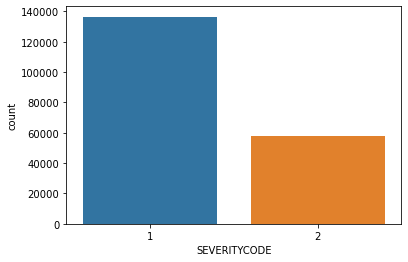

In [2]:
from matplotlib import pyplot as plt

sns.countplot(x='SEVERITYCODE', data=df)

#### ADDRTYPE

We can see most of collision happens at blocks, meanwhile much less at alleys.

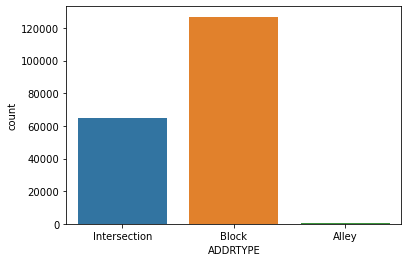

In [3]:
sns.countplot(x='ADDRTYPE', data=df)

#### JUNCTIONTYPE

Mid-block and intersection types have the most collisions.

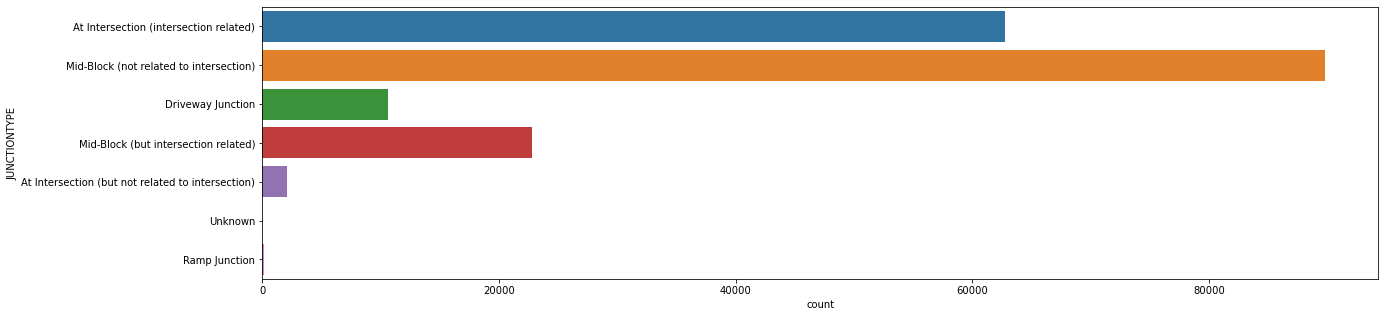

In [4]:
plt.figure(figsize=(20, 5))
sns.countplot(y='JUNCTIONTYPE', data=df)

#### INATTENTIONIND

We can see only 29 thousand of 194 thousand records are filled only. As per the document values should be in 'Y' and 'N', so we cannot use this column in our model.

In [5]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

#### UNDERINFL

This is about under inflation of alcohol or drugs column. Unfortunately fields are not filled poorly. We cannot use this column in our model.

In [6]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

#### PEDROWNOTGRNT

We can see only 4 thousand of 194 thousand records are filled only. As per the document values should be in 'Y' and 'N'. We cannot use this column in our model.

In [7]:
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

#### WEATHER

Interestingly 'Clear' weather has the most collisions.

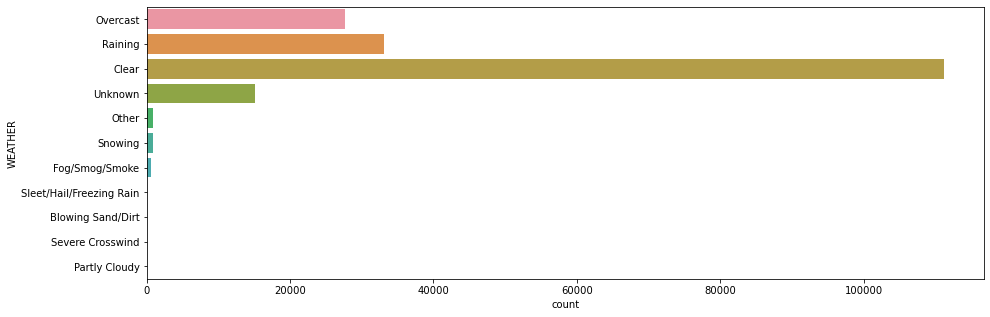

In [8]:
plt.figure(figsize=(15, 5))
sns.countplot(y='WEATHER', data=df)

#### ROADCOND

Interestingly 'Dry' weather has the most collisions.

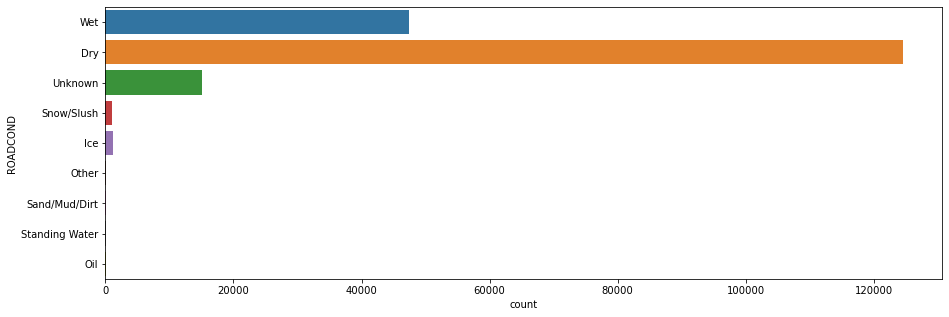

In [9]:
plt.figure(figsize=(15, 5))
sns.countplot(y='ROADCOND', data=df)

#### LIGHTCOND

Interestingly 'Daylight' weather has the most collisions.

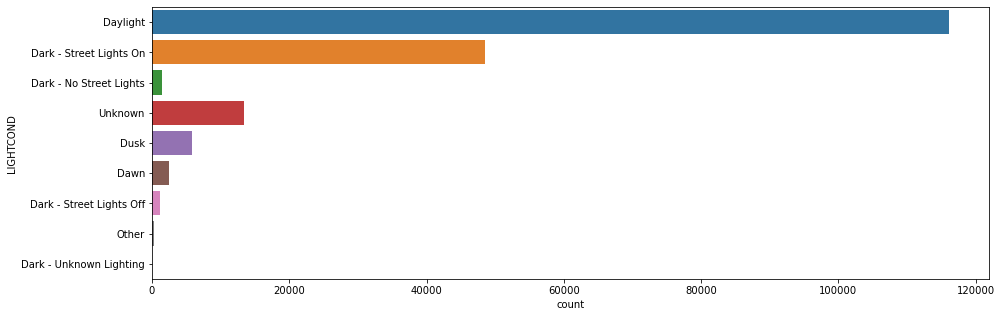

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(y='LIGHTCOND', data=df)

#### SPEEDING

We can see only 9 thousand of 194 thousand records are filled only. As per the document values should be in 'Y' and 'N'. We cannot use this column in our model.

In [11]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

#### INCDATE

We will extract the 'day of week' values from this column and see how it behaves. We can see the number of collisions are increasing as we are getting closer to weekend and than it reduces.

##### Day of week investigation

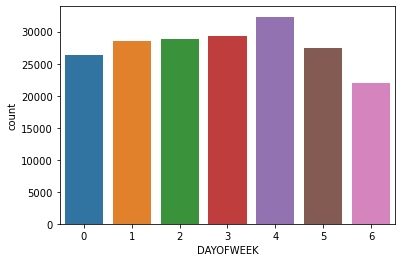

In [12]:
import pandas as pd

df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['DAYOFWEEK'] = df['INCDATE'].dt.dayofweek
sns.countplot(x='DAYOFWEEK', data=df)

##### Week of year investigation

We will extract the 'week of year' values from this column and see how it behaves during the years. The number of collisions are quite steady, so we will not use this extraction.

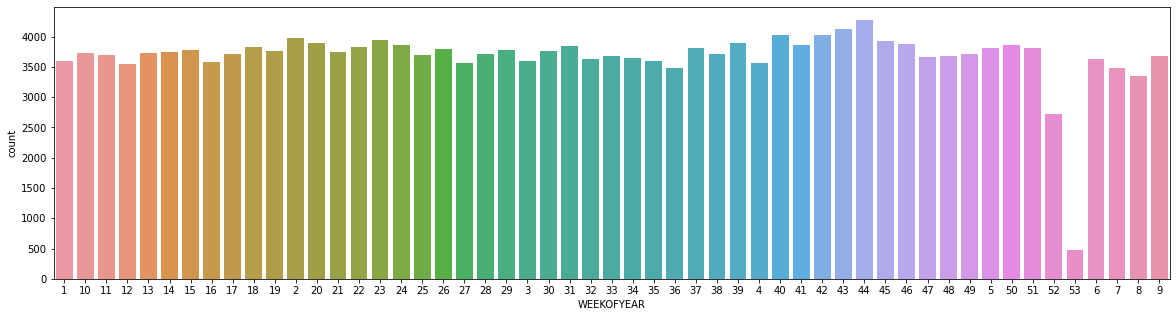

In [13]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['WEEKOFYEAR'] = df['INCDATE'].dt.weekofyear.astype(str)
plt.figure(figsize=(20, 5))
sns.countplot(x='WEEKOFYEAR', data=df)

#### INCDTTM

##### Hour of day investigation

We will extract the 'hour of day' values from this column and see how it behaves. We can see the number of collisions are increasing as we are getting towards the afternoon and decreases during the night.

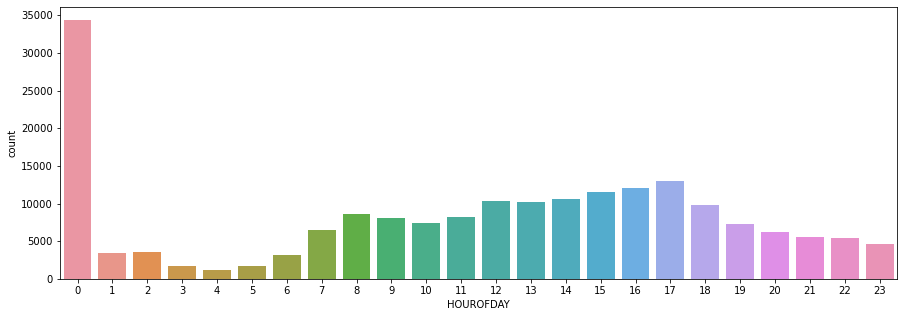

In [14]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOUROFDAY'] = df['INCDTTM'].dt.hour
plt.figure(figsize=(15, 5))
sns.countplot(x='HOUROFDAY', data=df)

### Reduce our working data set accordingly

In [15]:
df = df[['SEVERITYCODE', 'ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'DAYOFWEEK', 'HOUROFDAY']].copy()

### Missing values

See how many missing values we have in our columns.

In [16]:
df.isna().sum()

SEVERITYCODE       0
ADDRTYPE        1926
JUNCTIONTYPE    6329
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
DAYOFWEEK          0
HOUROFDAY          0
dtype: int64

### Imputing

Fill missing data with most popular values based on previous graphs

In [17]:
df['WEATHER'] = df['WEATHER'].fillna('Clear')
df['ROADCOND'] = df['ROADCOND'].fillna('Dry')
df['LIGHTCOND'] = df['LIGHTCOND'].fillna('Daylight')

### dropna

Drop rows with missing data

In [18]:
df.dropna(axis=0, inplace=True)

### Data conversions

#### Onehot encoding

We are onehot encoding our categorical columns with Pandas

In [19]:
countcols = df[['SEVERITYCODE']].copy()

In [20]:
c1 = pd.get_dummies(df['ADDRTYPE'])
c2 = pd.get_dummies(df['JUNCTIONTYPE'])
c3 = pd.get_dummies(df['WEATHER'])
c4 = pd.get_dummies(df['ROADCOND'])
c5 = pd.get_dummies(df['LIGHTCOND'])
c6 = pd.get_dummies(df['DAYOFWEEK'])
c7 = pd.get_dummies(df['HOUROFDAY'])

In [21]:
df_prep = pd.concat([countcols, c1], axis=1)
df_prep = pd.concat([df_prep, c2], axis=1)
df_prep = pd.concat([df_prep, c3], axis=1)
df_prep = pd.concat([df_prep, c4], axis=1)
df_prep = pd.concat([df_prep, c5], axis=1)
df_prep = pd.concat([df_prep, c6], axis=1)
df_prep = pd.concat([df_prep, c7], axis=1)

### Set up X and y

In [22]:
X = df_prep.copy()

In [23]:
y = X['SEVERITYCODE']

In [24]:
X.drop('SEVERITYCODE', axis=1, inplace=True)

## Predictive modeling

### Test harness

#### Train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#### Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

trans = ColumnTransformer([
    ('tr1', StandardScaler(), [0, 1, 2, 3])],
    remainder='passthrough'
)

X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

### Choosing evaluation metric

We previously saw that there is a slight inbalance in our labels; we have 2 times more data width label '1' than label '2'. We are not going to use 'accuracy' metric for our binary classification problem because it would be biased. Rather than we use classification riport's 'macr avg' values.

We will use several test cases:
- In test1 we are going to find good n_neighbors parameter for KNN
- In test2 we use logistic regression with class_weight with default inbalance set
- In test3 we use logistic regression with rebalanced / upscaled dataset, in which both target values have same amount of rows.
- In test4 we use several machine learning algorithms with upscaled dataset

### test1 - finding good n_neighbors parameter for KNN

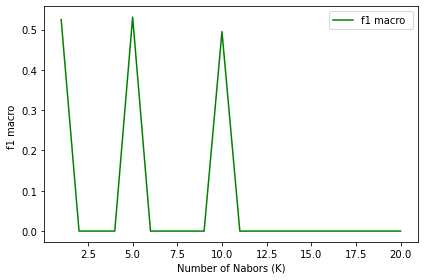

In [27]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

mean_acc=np.zeros(20)
for n in (1, 5, 10):
    knnmodel=KNeighborsClassifier(n_neighbors=n, n_jobs=-1).fit(X_train, y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.f1_score(y_test, y_pred, average='macro')
    
plt.plot(range(1,21),mean_acc,'g')
plt.legend(('f1 macro ', '+/- 3xstd'))
plt.ylabel('f1 macro ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

We choose n_neighbors = 5

### test2 - logistic regression using class_weight with default inbalance set

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np

model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           1       0.78      0.61      0.68     26004
           2       0.41      0.61      0.49     11599

    accuracy                           0.61     37603
   macro avg       0.59      0.61      0.59     37603
weighted avg       0.66      0.61      0.62     37603



Our label '2' results are much better, but precision is still little bit low.

### test3 - logistic regression with rebalanced / upscaled dataset

#### Upscaling

We upscale our rows with label '1'. We use our already prepared df_base dataset.

In [30]:
X1 = df_prep[df_prep['SEVERITYCODE'] == 1].copy()
X2 = df_prep[df_prep['SEVERITYCODE'] == 2].copy()

In [31]:
X2_upscaled = X2.sample(n=len(X1), replace=True)
X = pd.concat([X1, X2_upscaled])

In [32]:
y = X['SEVERITYCODE']

In [33]:
X.drop('SEVERITYCODE', axis=1, inplace=True)

#### Train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#### Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

trans = ColumnTransformer([
    ('tr1', StandardScaler(), [0, 1, 2, 3])],
    remainder='passthrough'
)

X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

#### Run model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report) 

              precision    recall  f1-score   support

           1       0.60      0.61      0.61     26150
           2       0.60      0.60      0.60     25959

    accuracy                           0.60     52109
   macro avg       0.60      0.60      0.60     52109
weighted avg       0.60      0.60      0.60     52109



Our f1-score numbers are much more balanced between label '1' and '2'. interestingly the previous 'class_weigth' run cannot produce similar results. This is our best model so far.

### test4 - spot check machine learning algorithms with upscaled dataset

#### Define model

We use several machine learning models to compare their results.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = [
    ('LR', LogisticRegression(solver='liblinear')),
    ('DTC', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('GNB', GaussianNB()),
]

#### Standardization

We define a column transformer for later standardization

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

trans = ColumnTransformer([
    ('tr1', StandardScaler(), [0, 1, 2, 3])],
    remainder='passthrough'
)

#### Cross_val_score

We use the famous cross_val_score to test our models.

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

num_folds = 3
seed = 7
scoring = 'f1_macro'

names = []
results = []
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
for name, model in models:
    cv_results = cross_val_score(estimator=make_pipeline(trans, model), X=X, y=y, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s, mean:%.3f, std:%.3f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR, mean:0.607, std:0.002
DTC, mean:0.620, std:0.002
KNN, mean:0.373, std:0.001
GNB, mean:0.488, std:0.001


## Results


The investigation shows Decision Tree Classifier reached the highest output. This could be even improved with hyperparameter tuning.

## Discussion


With additional machine learning algorithms this score could even be raised for example using Ensemble methods. With additinal investigation dropped but useful features like UNDERINFL or SPEEDING could have been used.

## Conclusion

The dataset only contains binary data for severity, however, there could be more scenarios for a car accident and also the people involved.

Extremely dangerous weather and road conditions do not produce a quite significant accident rate, such as snow and ice.